# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев


## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Часть 0: Импортируем библиотеки и загружаем данные

**Запустим уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**С помощью метода .info() проверим типы данных для колонок, а также есть ли отсутствующие значения в нашем датафрейме.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Выведим статистические метрики для числовых колонок с помощью .describe(). Мы увидим, что большинство колонок являются категориальными, поэтому нам позднее нужно будет создать для них дамми-переменные.**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Проверим, что в этих данных нет отсутствующих значений - для этого выведим количество значений NaN отдельно для каждой колонки.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Построем график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<AxesSubplot:xlabel='Churn', ylabel='count'>

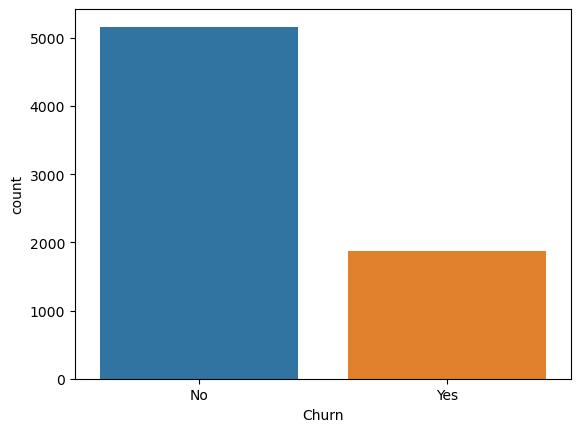

In [7]:
sns.countplot(data=df, x='Churn')

**Исследуем распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

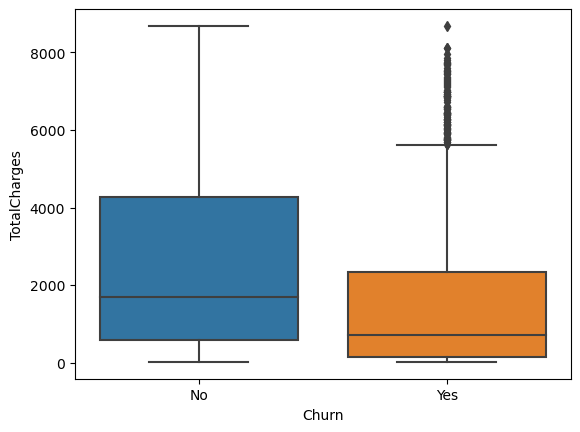

In [11]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

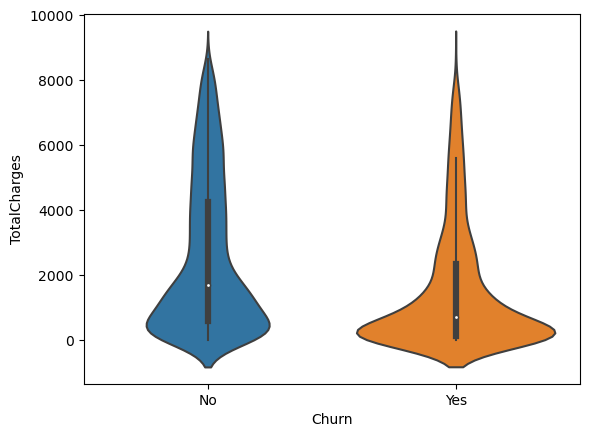

In [12]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**Построим график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавим раскраску цветами по колонке Churn.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

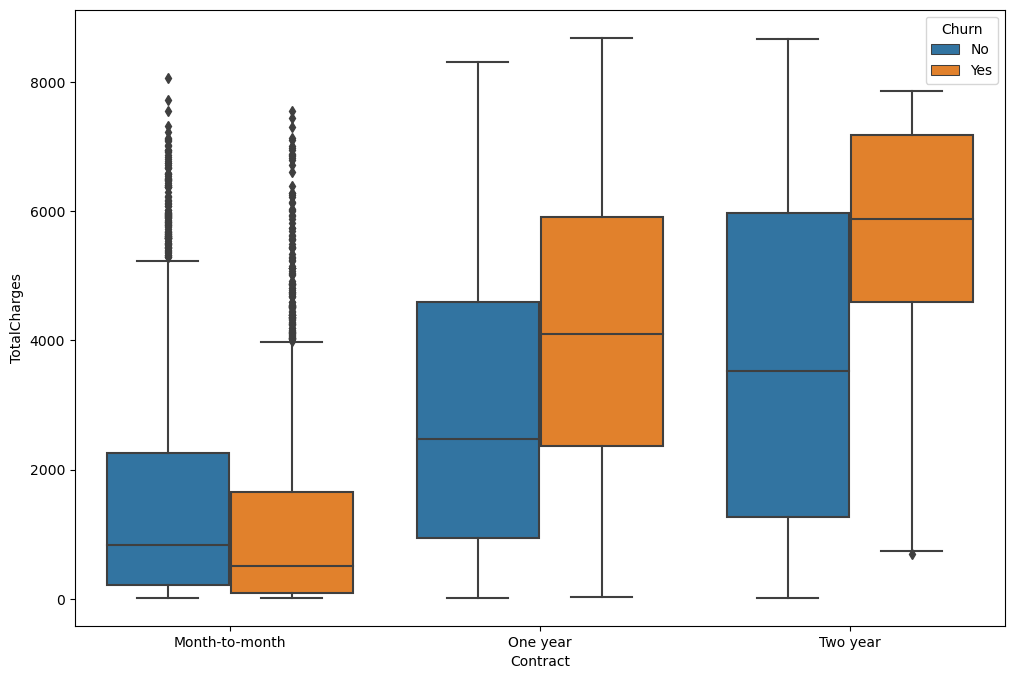

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

**Построим график barplot с корреляции указанных ниже признаков с целевой переменной. Обратим внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [32]:
corr['Churn_Yes'].sort_values()[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

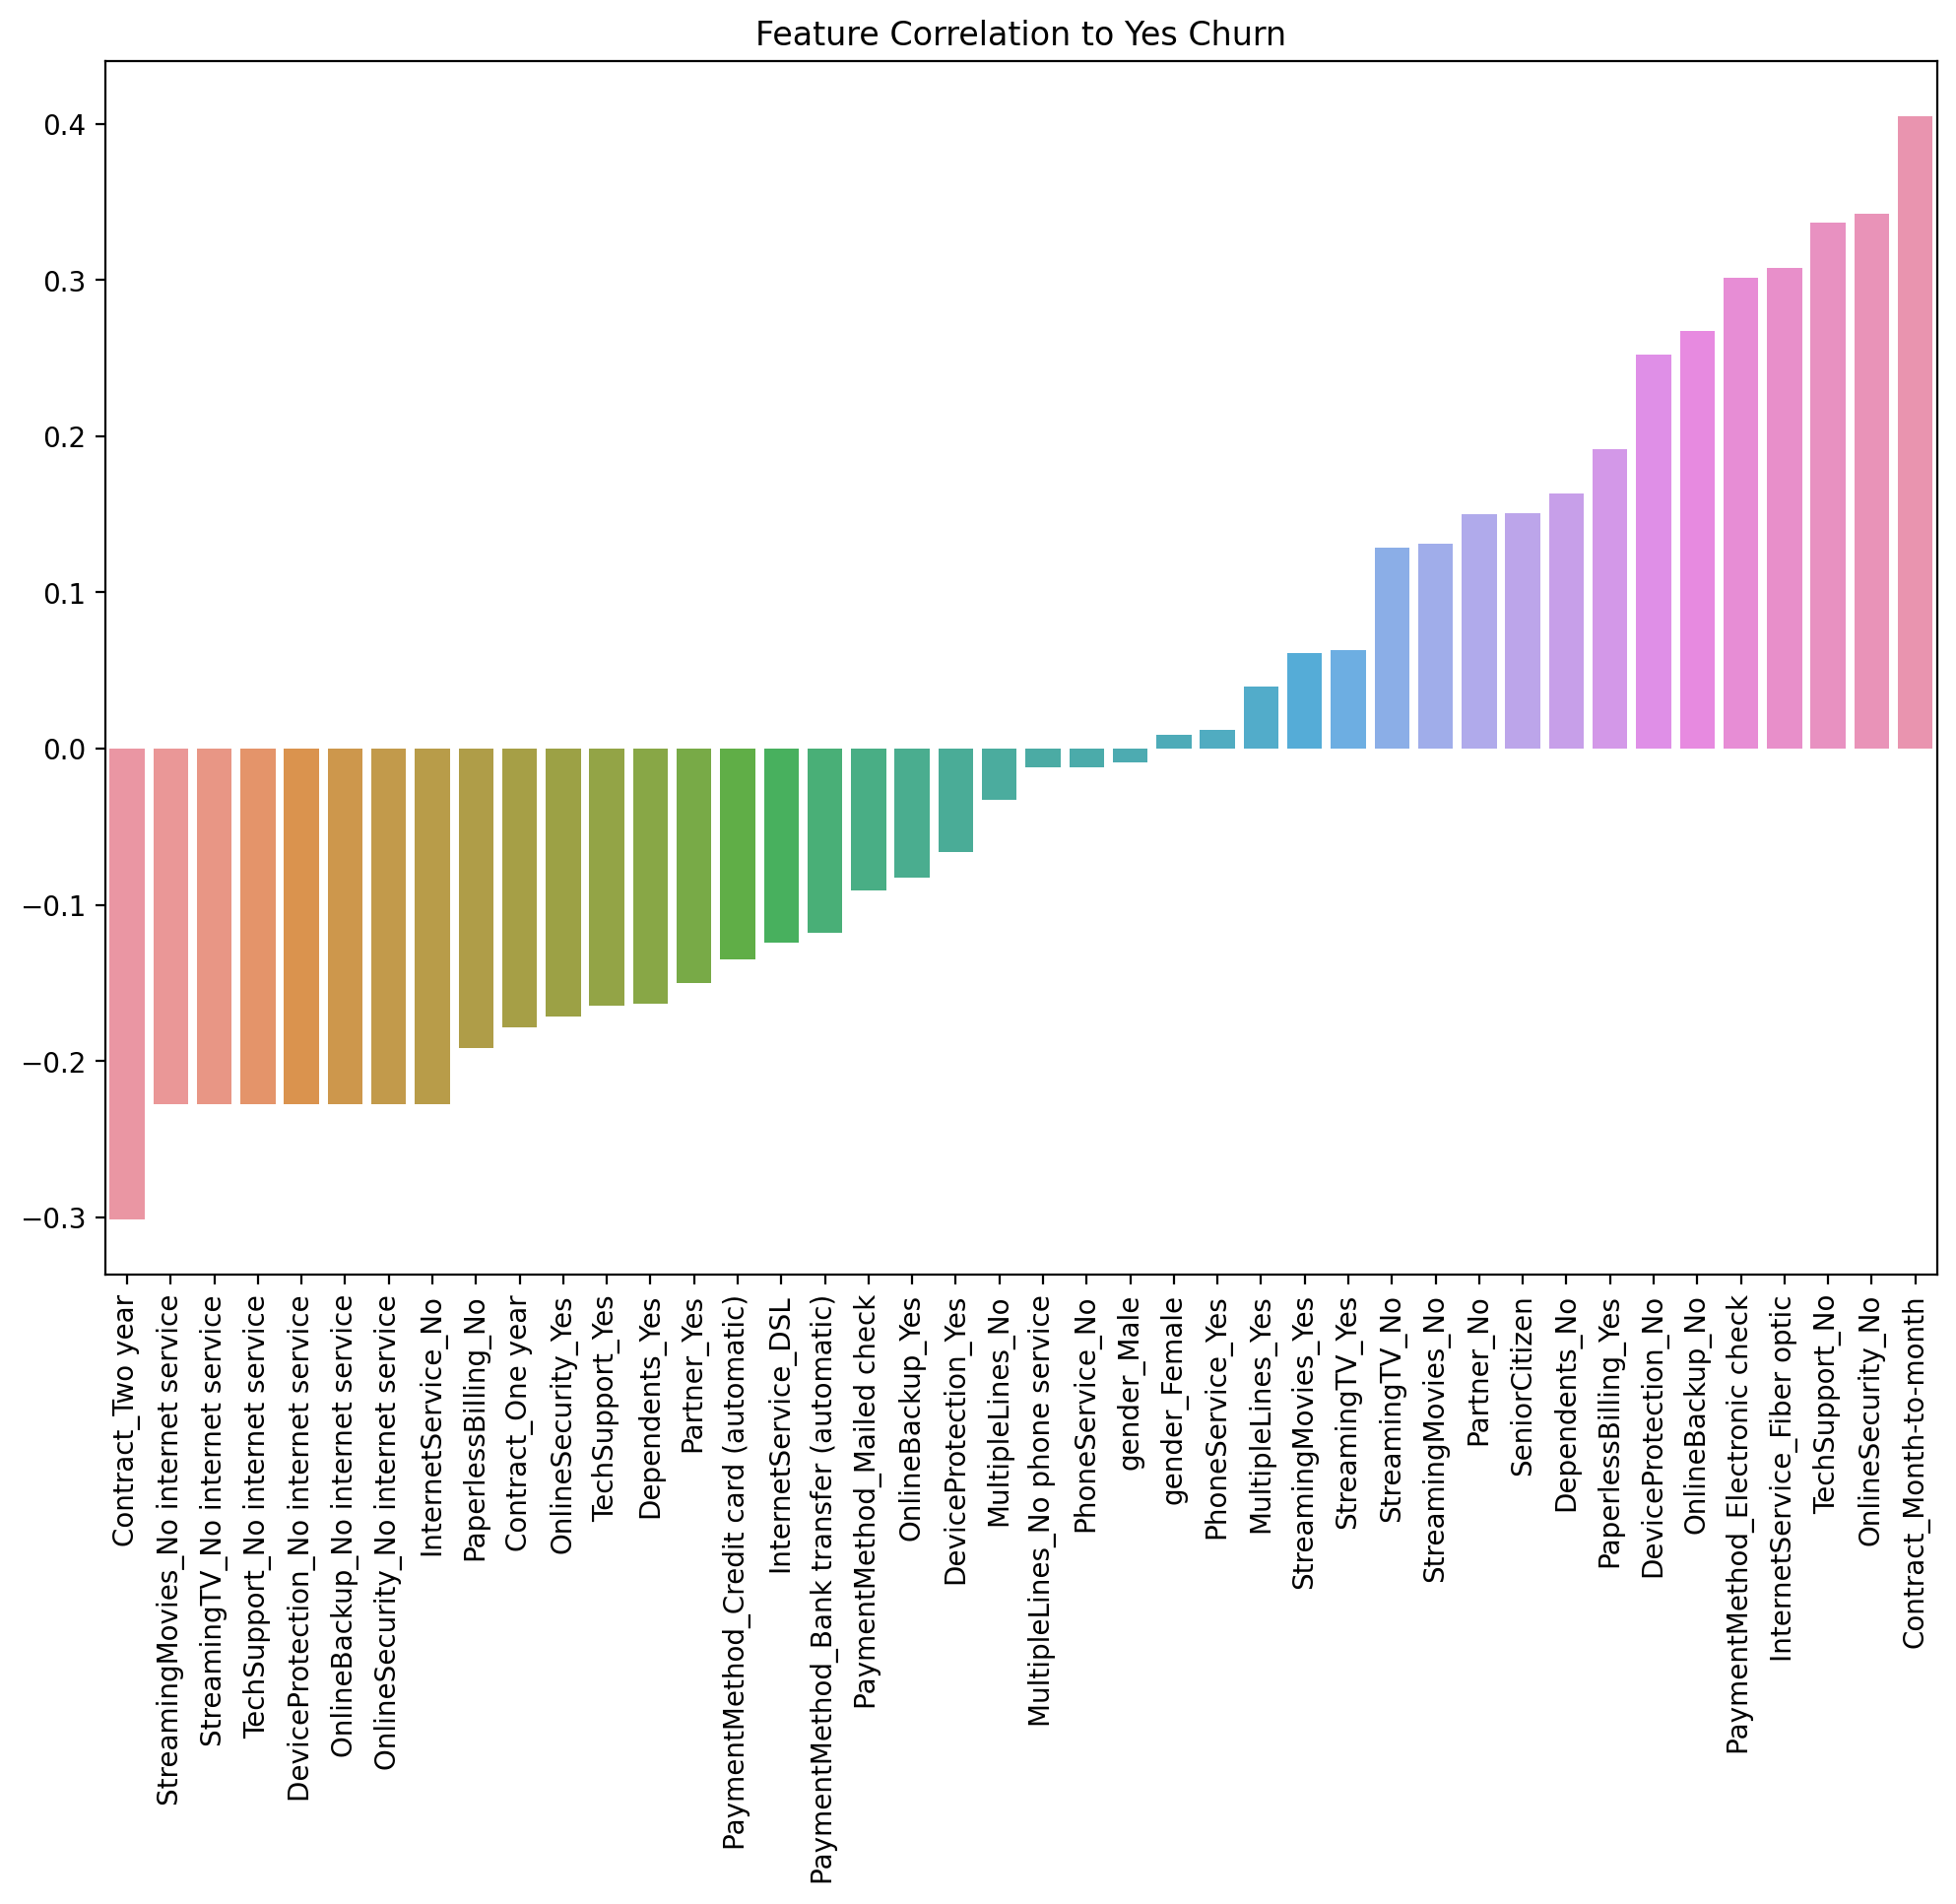

In [38]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x=corr['Churn_Yes'].sort_values()[1:-1].index, y=corr['Churn_Yes'].sort_values()[1:-1].values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Перечислим 3 типа контракта (колонка Contract).**

In [42]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Создадим гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

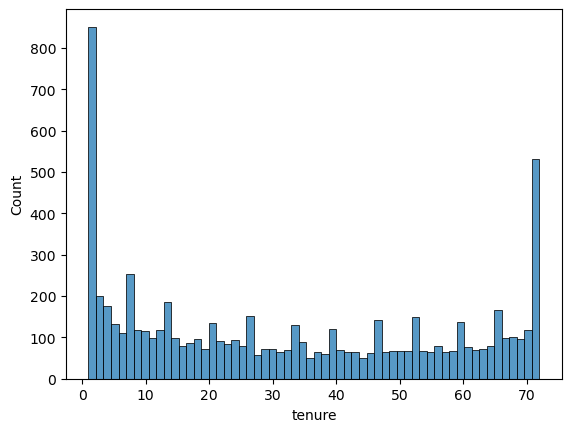

In [45]:
sns.histplot(data=df, x='tenure', bins=60)

**Построим гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract.**

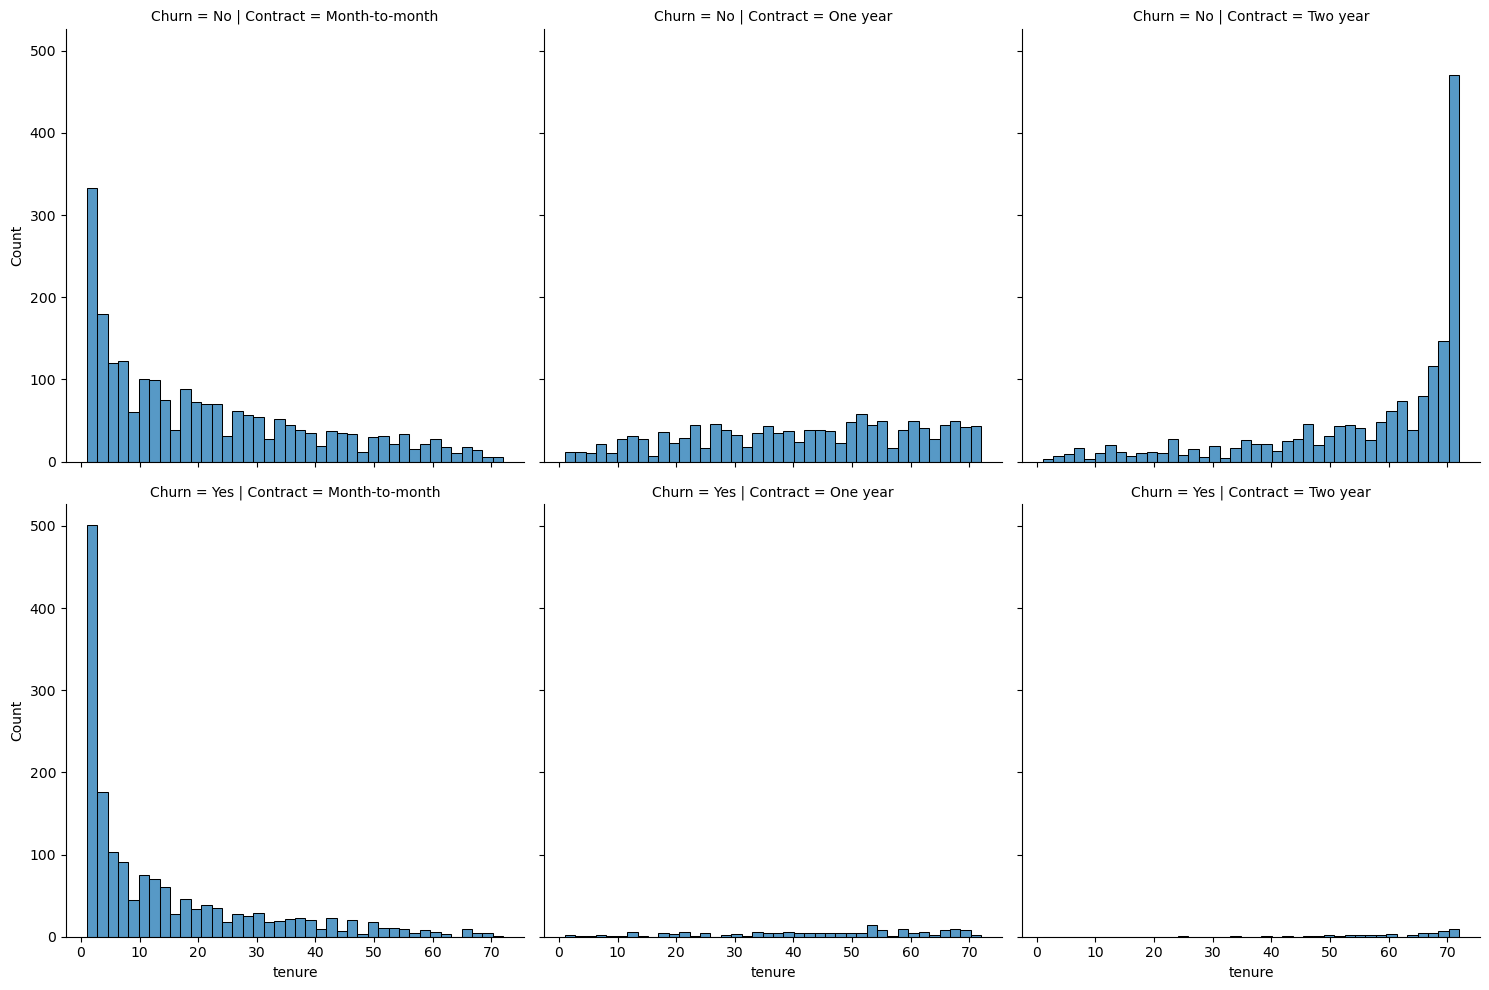

In [52]:
sns.displot(data=df, x='tenure', col='Contract',row='Churn', bins=40)

**Построим график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

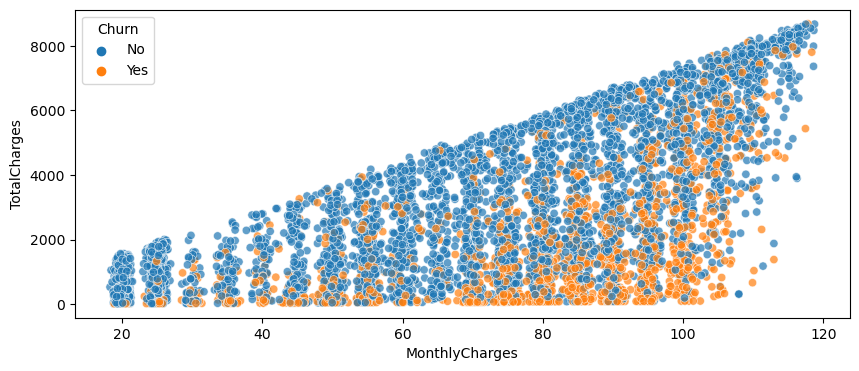

In [68]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.7, linewidth=0.5)

### Создадим когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Для каждого уникального значения колонки tenure в качестве когорты, вычислим процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислим такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у нас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [96]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Используем результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

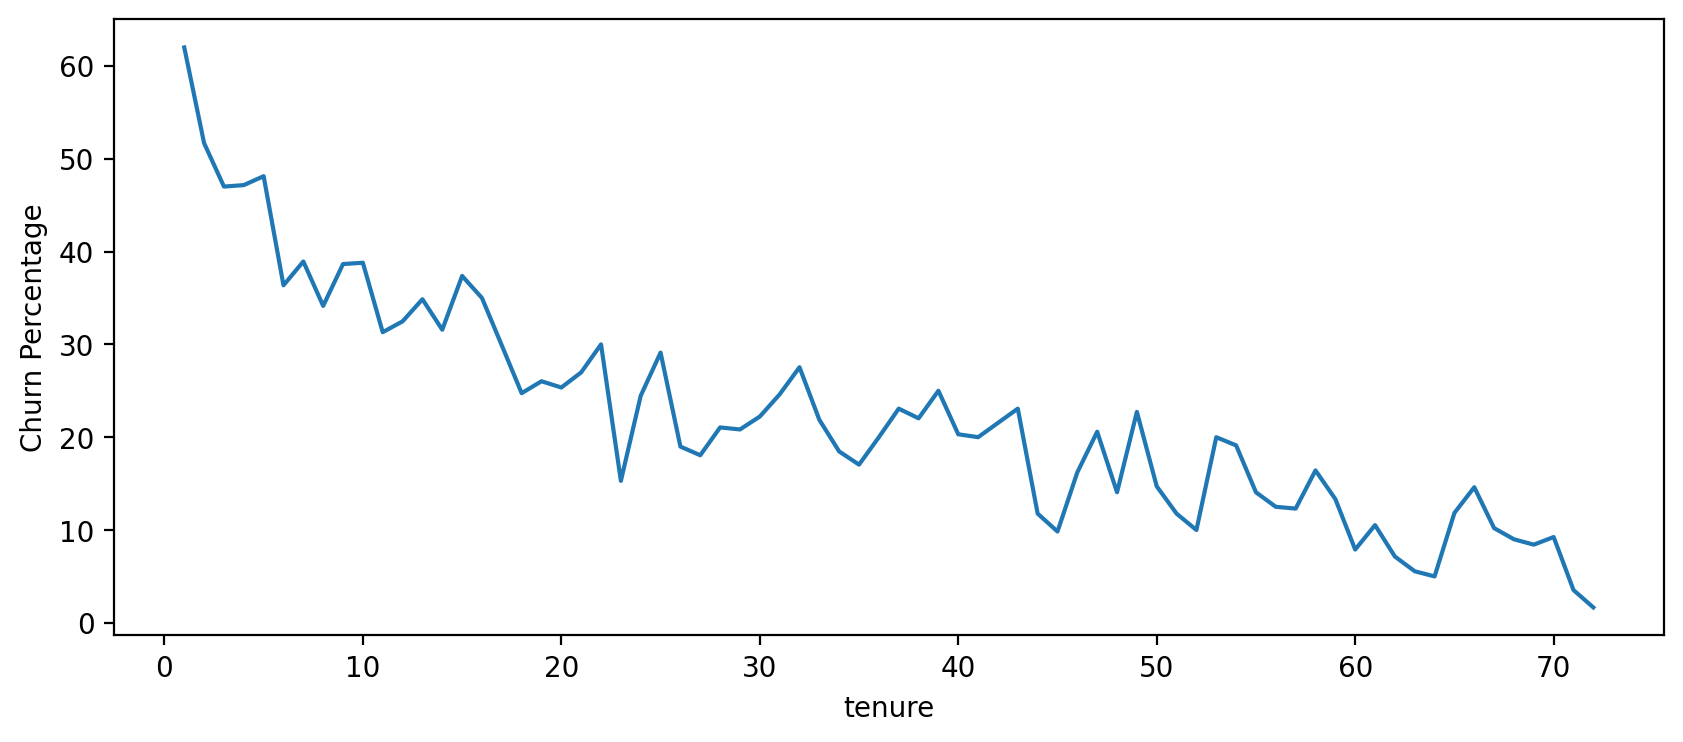

In [100]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Более крупные когорты (сегменты)
**На основе колонки tenure создадим новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [135]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"
    
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [138]:
df.head(10)[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Построим график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую мы создали в предыдущем задании.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

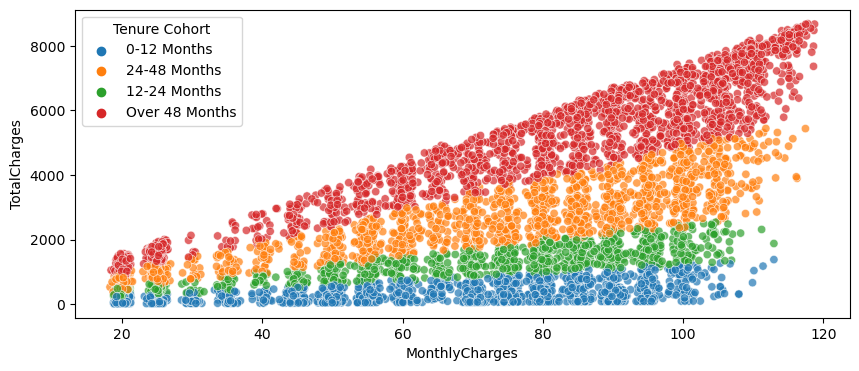

In [140]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Tenure Cohort', alpha=0.7, linewidth=0.5)

**Построим график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

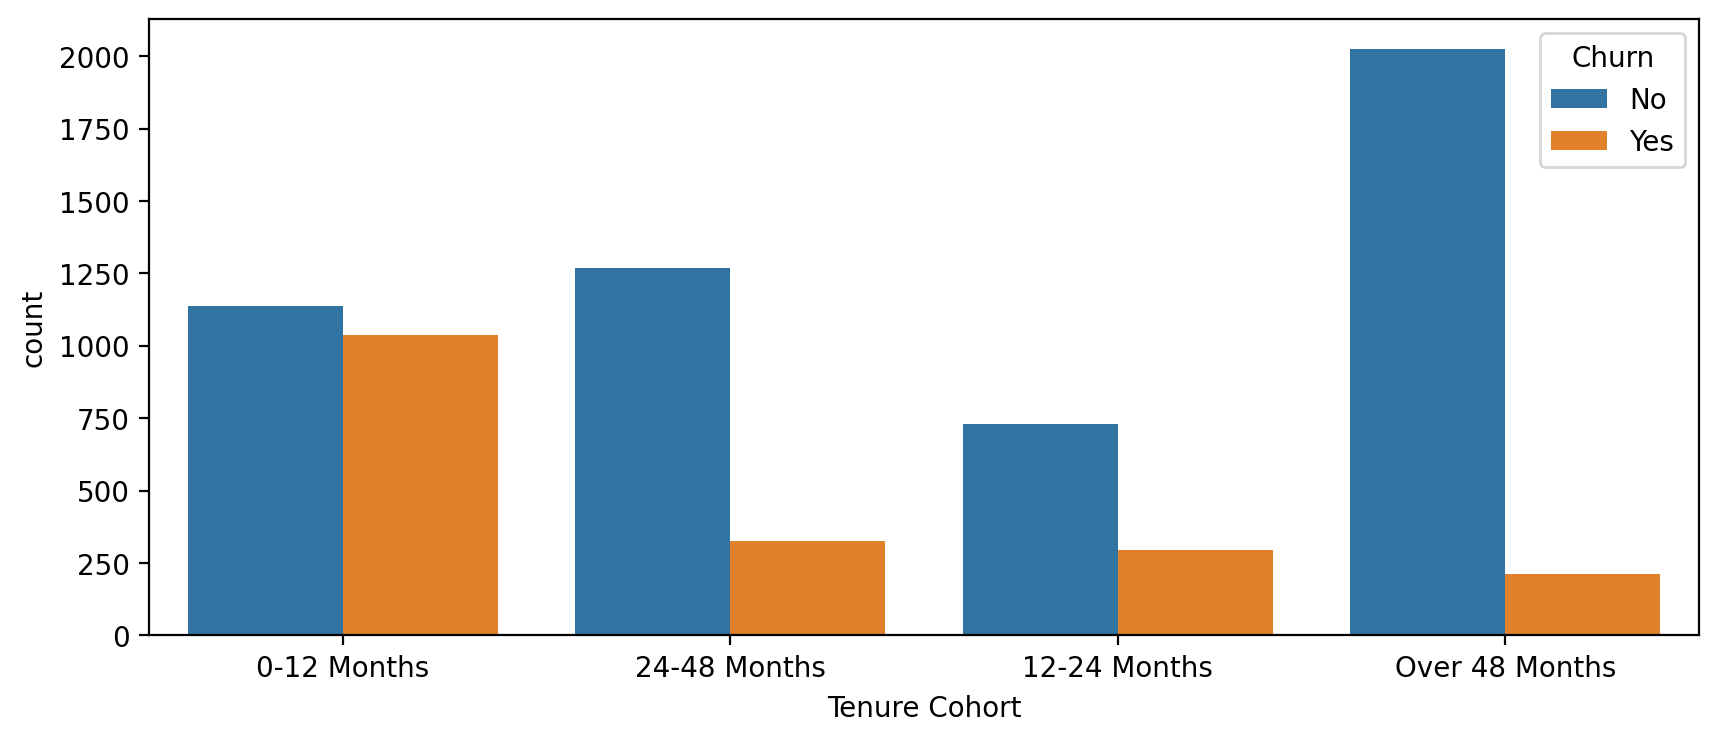

In [145]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Создадим набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создадим отдельный график, и раскрасим эти графики разными цветами по колонке Churn.**

<Figure size 2000x800 with 0 Axes>

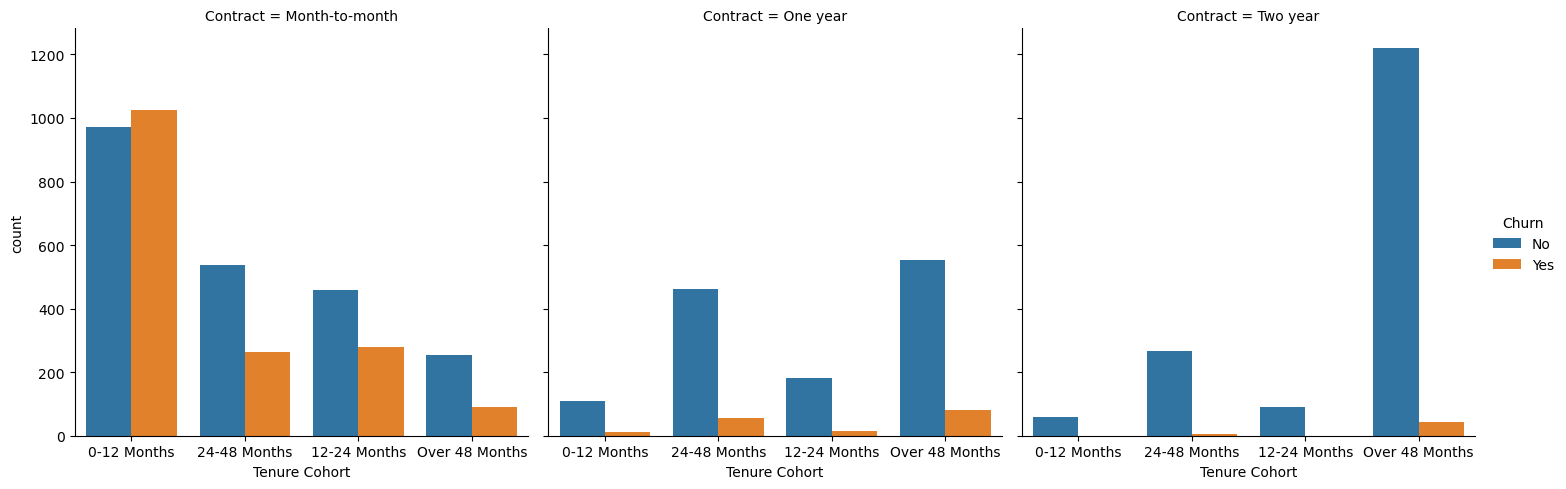

In [146]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

-----

# Часть 4: Предиктивная модель

**Исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг.**


## Одно дерево решений (Decision Tree)

**Разделим все данные на признаки X и целевую переменную Y. Создадим дамми-переменные, где это необходимо, а также посмотрим, есть ли какие-то признаки, которые можно было бы удалить.**

In [162]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [163]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [164]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

**Выполним разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [151]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Построим модель Decision Tree и оценим её работу.**

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [166]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': range(2, 15),
             'min_samples_split': range(2, 10),
             'min_samples_leaf': range(2, 10)}

In [167]:
model = DecisionTreeClassifier(max_depth=6)
grid = GridSearchCV(model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [196]:
model = grid.best_estimator_

In [169]:
grid.score(X_test, y_test)

0.7982954545454546

In [171]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [172]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

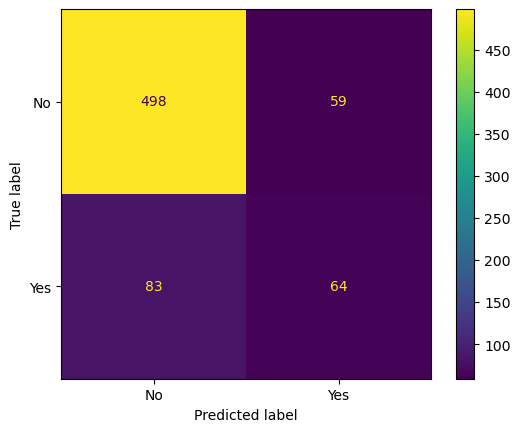

In [173]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [183]:
imp = pd.DataFrame(index=X.columns, data=grid.best_estimator_.feature_importances_, columns=['Feature Importance']).sort_values(by=['Feature Importance'])

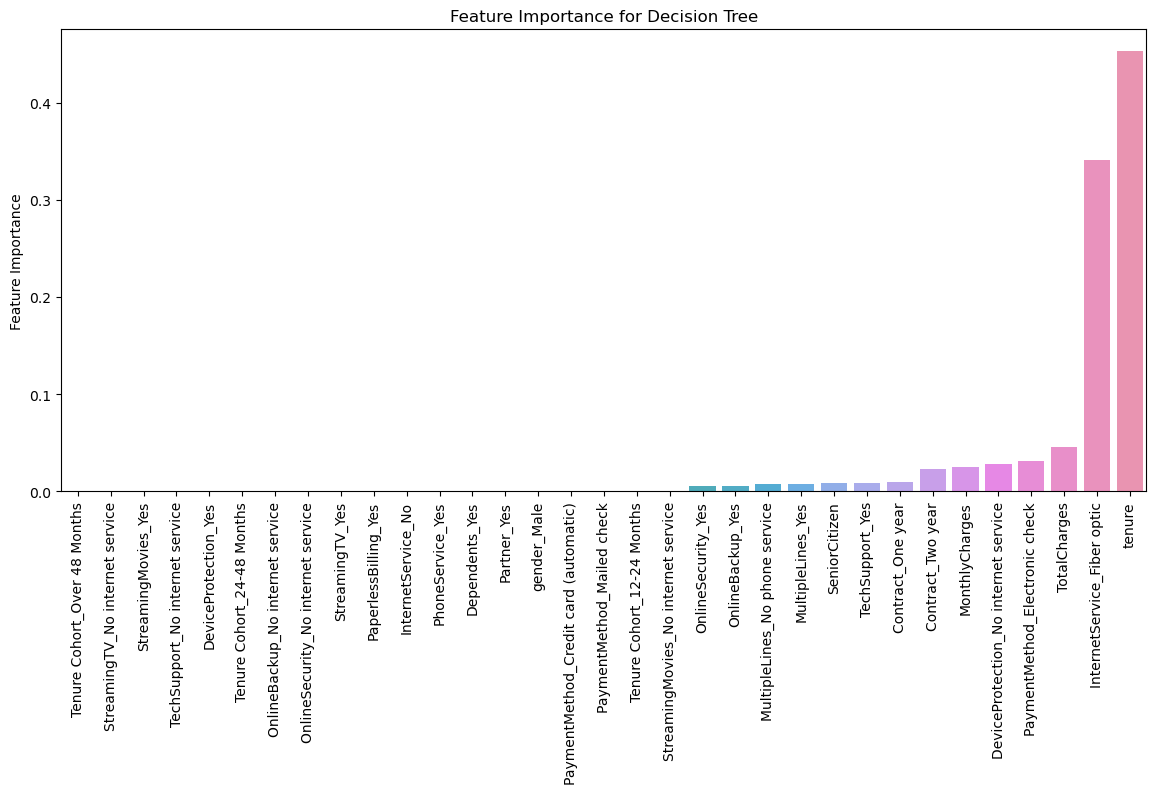

In [188]:
plt.figure(figsize=(14, 6))
sns.barplot(data=imp, x=imp.index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [189]:
from sklearn.tree import plot_tree

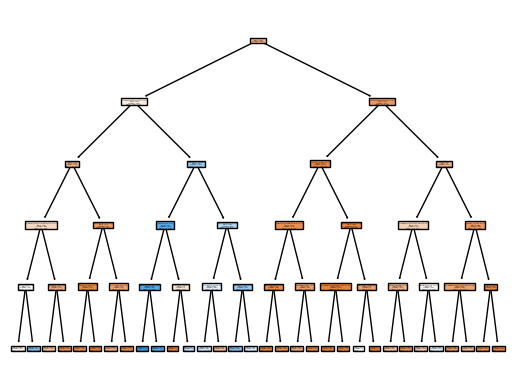

In [198]:
plot_tree(model, feature_names=X.columns, filled=True);

## Случайный лес (Random Forest)

**Создадим модель случайного леса, затем выведим отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [201]:
preds = rf.predict(X_test)

In [202]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.43      0.46       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



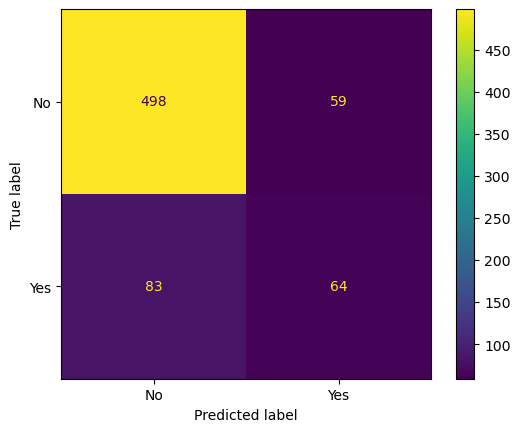

In [203]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

## Расширяемые деревья (Boosted Trees)

**Создадим модель AdaBoost или Gradient Boosting, затем выведим отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [204]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [214]:
ada_model = AdaBoostClassifier()
grad_model = GradientBoostingClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [215]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [216]:
preds = ada_model.predict(X_test)
pred = grad_model.predict(X_test)

In [208]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [217]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



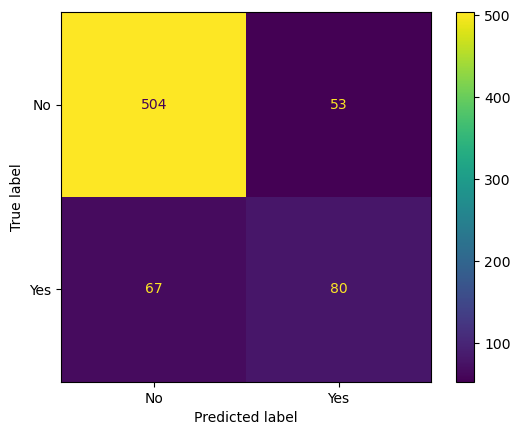

In [218]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

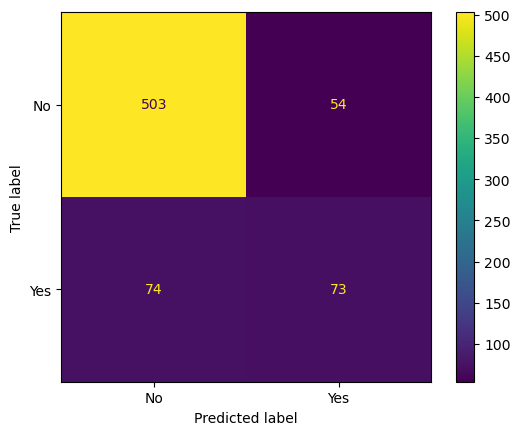

In [219]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

**Сравним результаты работы моделей**

In [210]:
# У нас получились наилучшие результаты в модели AdaBoostClassifier, 
# и целом модели показывали очень похожие результаты на этих данных.

### Отличная работа!